In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_csv("restaurant.csv")

In [3]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


In [5]:
df=df[['stars','text']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   stars   10417 non-null  int64 
 1   text    10417 non-null  object
dtypes: int64(1), object(1)
memory usage: 162.9+ KB


#NLP Projesinde 7 altın kural
1- Hepsini küçük harfe çevir.
2- Noktalama işaretlerini kaldır.
3- Rakamları kaldır.
4- Satır sonu ve Enter veya \n \r kaldir
5- Stopwords kaldır gereksiz kelimeleri kaldır.
6- Tokenize et.Kelimeleri tek tek ayır array yada listeye at.
7- Lemma ve Stemma ile eklerini kaldır köklerini bul.
8- Vectorize ile yazıları rakama çevir

In [6]:
df['text']=df['text'].str.lower() #küçük harfe çevirdik

In [7]:
df['text']=df['text'].str.replace('[^\w\s]','') #noktalama işaretlerini kaldirdik

In [8]:
df['text']=df['text'].str.replace('\d+','') #rakamlari kaldirdik

In [9]:
df['text']=df['text'].str.replace('\n',' ').replace('\r',' ') #Enter ve yeni satir kodlarini kaldirdik

In [10]:
df.loc[df['stars']==3,"sentiment"]="neutral"
df.loc[df['stars']<3,"sentiment"]="negative"
df.loc[df['stars']>3,"sentiment"]="positive"

In [11]:
df=df[['stars','sentiment','text']]
df

,stars,sentiment,text
0,5,positive,after getting food poisoning at the palms hote...
1,4,positive,a feast worthy of gods baccarnal buffet in ca...
2,4,positive,the crab legs are better than the ones at wick...
3,1,negative,not worth it too salty food and expensive this...
4,5,positive,i would give this infinite stars if i could my...
...,...,...,...
10412,5,positive,best buffet ever irma was great served us bett...
10413,4,positive,hollllllyyyy moleyyyy this buffet was one fo...
10414,5,positive,the selection is amazing and all the food is e...
10415,4,positive,one of the best buffets ive had in vegas my on...


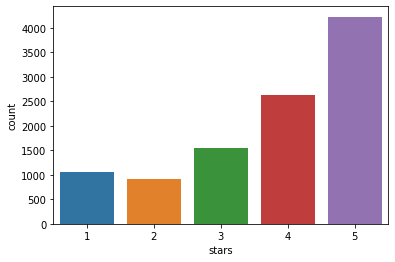

In [28]:
sns.countplot(df['stars']);

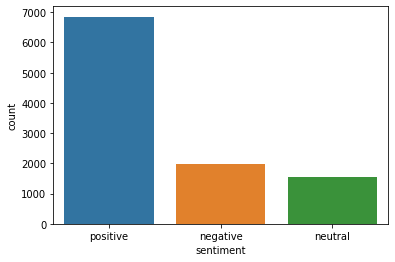

In [29]:
sns.countplot(df['sentiment']);

In [12]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 5.1 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=86b845672d88b1568cb06ec710a836812a43466dc8cf9d9ea2c8bc52877b07aa
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [13]:
from langdetect import detect

def detect_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

In [14]:
df = df[df['text'].apply(detect_english)]

In [15]:
df.shape #42 adet ing olmayan veriyi sildi

(10374, 3)

In [16]:
df.reset_index(drop=True,inplace=True) #indexleri düzeltiyoruz

In [17]:
df.head()

,stars,sentiment,text
0,5,positive,after getting food poisoning at the palms hote...
1,4,positive,a feast worthy of gods baccarnal buffet in ca...
2,4,positive,the crab legs are better than the ones at wick...
3,1,negative,not worth it too salty food and expensive this...
4,5,positive,i would give this infinite stars if i could my...


In [18]:
x=df.text 
y=df.sentiment

In [19]:
pip install xgboost==0.90

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
def tokenize_test(vect,x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=60)
    
    print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
    
    g=GaussianNB()
    b=BernoulliNB()
    m=MultinomialNB()
    SVC=SVC()
    KN=KNeighborsClassifier()
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGBC=XGBClassifier()
    
    algos=[g,b,m,SVC,KN,D,R,Log,XGBC]
    algo_names=['GaussianNB','BernoulliNB','MultinomialNB','SVC','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
    
   
    
    accuracy_scored=[]    
        
    x_train_dtm=vect.fit_transform(x_train).toarray()
    x_test_dtm=vect.transform(x_test).toarray()
    
    for item in algos:
        item.fit(x_train_dtm,y_train)
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test_dtm)))
    result=pd.DataFrame(accuracy_scored,columns=['accuracy_score'],index=algo_names)
    result.accuracy_score=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

In [21]:
vect=CountVectorizer()
tokenize_test(vect,x,y)

(8299,) (2075,) (8299,) (2075,)


,accuracy_score
LogisticRegression,0.800482
MultinomialNB,0.794699
SVC,0.775904
XGBClassifier,0.762410
RandomForestClassifier,0.706988
BernoulliNB,0.693976
KNeighborsClassifier,0.684819
DecisionTreeClassifier,0.666024
GaussianNB,0.399036


In [30]:
def wc(data,bgcolor):
    from PIL import Image
    mask = np.array(Image.open("cloud.png"))
    wc=WordCloud(background_color=bgcolor, width=800, height=400,mask=mask,max_words=100).generate(' '.join(data))
    plt.figure( figsize=(20,10) )
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

In [31]:
negativedf=df[df['sentiment']=="negative"]['text']
positivedf=df[df['sentiment']=="positive"]['text']
neutraldf=df[df['sentiment']=="neutral"]['text']

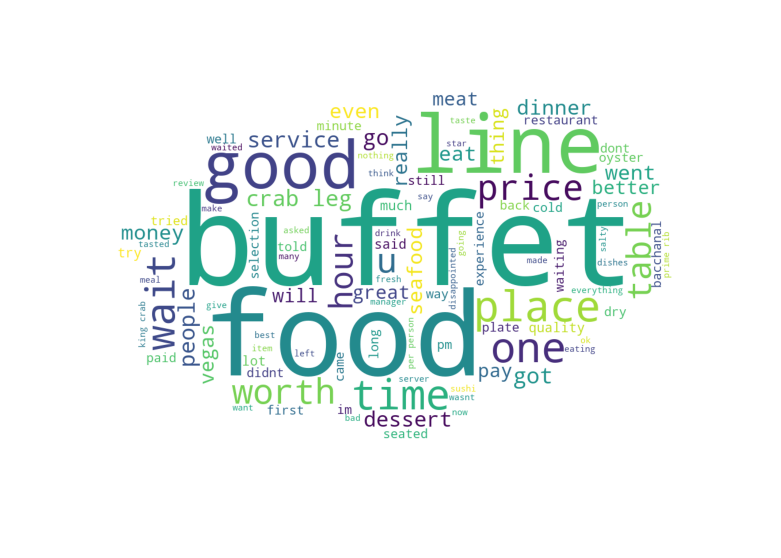

In [32]:
wc(negativedf,'white')

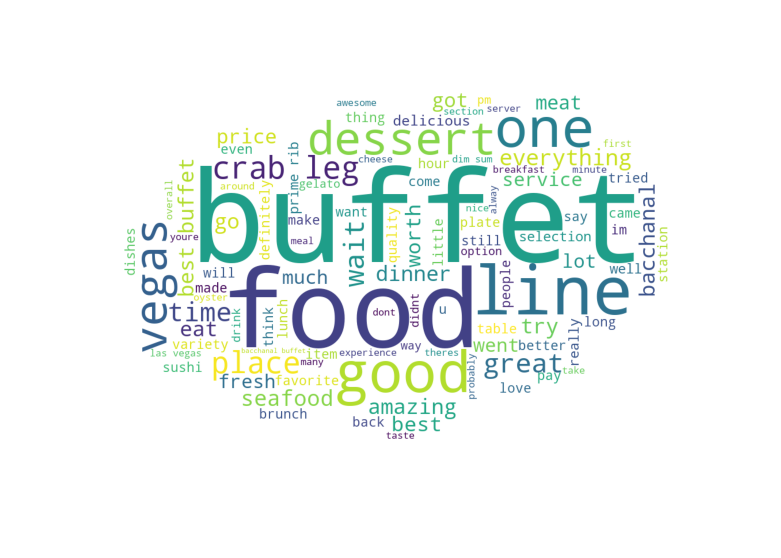

In [33]:
wc(positivedf,'white')

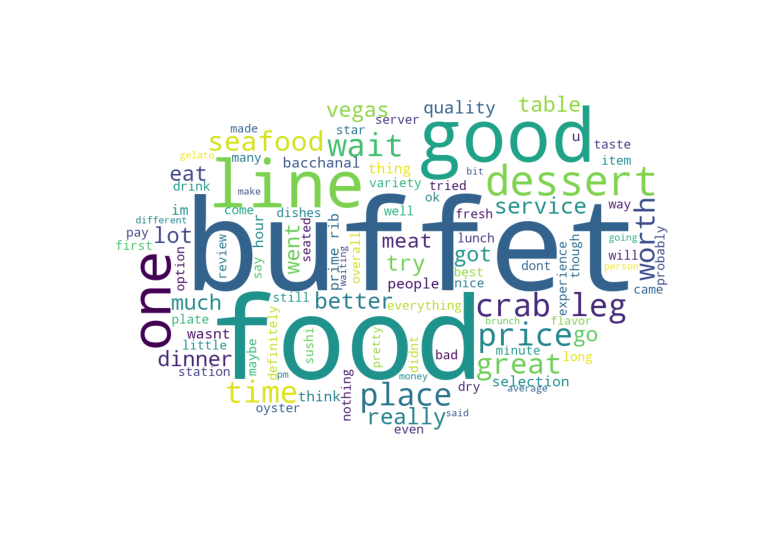

In [34]:
wc(neutraldf,'white')